In [2]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import os

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [6]:
# load in dataset:
# Modify the directory name to the one you placed the dataset in
os.chdir('/home/greg/Data')
dat = pd.read_excel('tfl-daily-cycle-hires.xls', sheet_name='Data')

# we are only interested in the first two columns, drop the rest
dat = dat[ [u'Day', u'Number of Bicycle Hires']]
dat.head()

,Day,Number of Bicycle Hires
0,2010-07-30,6897
1,2010-07-31,5564
2,2010-08-01,4303
3,2010-08-02,6642
4,2010-08-03,7966


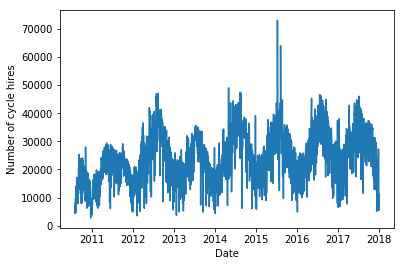

In [7]:
plt.plot( dat['Day'], dat['Number of Bicycle Hires'] )
plt.xlabel('Date')
plt.ylabel('Number of cycle hires')
plt.show()

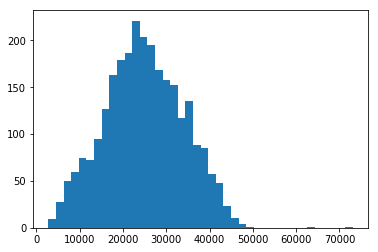

In [8]:
# Histrogram of the data to demonstrate there are large positive outliers.
# It is important to note that due to the seasonality, there may also be large 
# negative outliers, but we cannot spot them in the histogram below as 
# they are within the range of the data. 
#
# the data appears to be approximately Gaussian, with a few outliers (we discuss these below).
# so we don't need to transform the data (e.g., via log transform)
plt.hist((dat['Number of Bicycle Hires']), bins=40)
plt.show()

In [9]:
# The prophet package expects input as a dataframe with the first column indicating time and 
# the second indicating the time series we wish to forecast
dat['Day'] = pd.DatetimeIndex( dat['Day'] )

# It also expects these columns to have the names 'ds' and 'y', so we rename them accordingly
dat = dat.rename(columns={'Day': 'ds', 'Number of Bicycle Hires': 'y'}) 
dat.head()

,ds,y
0,2010-07-30,6897
1,2010-07-31,5564
2,2010-08-01,4303
3,2010-08-02,6642
4,2010-08-03,7966


In [10]:
# Following our discussion, we add a set of outliers/holidays for our Prophet model.
# we make a separate DataFrame for bank holidays and for tube strikes

# We get the list of bank holidays from the following csv file:
bank_holidays = pd.DataFrame({
    'holiday': 'BankHoliday',
    'ds'     : pd.to_datetime( list(pd.read_csv('BankHolidayLists.csv')['Date']) )
})

strike_days = pd.DataFrame({
    'holiday': 'strike',
    'ds'     : pd.to_datetime( ['2017-08-05', '2017-08-06', '2017-02-06', '2015-07-09', '2015-07-08', '2015-03-08'] )
})


all_holidays_strikes = pd.concat( (bank_holidays, strike_days) )
all_holidays_strikes.tail(n=10)

FileNotFoundError: File b'BankHolidayLists.csv' does not exist